<div style="background: #000000;
            color: #00ffff;
            font-weight: bold;
            padding: 20px 40px;
            border-radius: 20px;
            text-align: center;
            font-size: 40px;
            border: 4px solid #00ffff;">
ADVERTISING BUDGET AND SALES – A STATISTICAL DEEP DIVE
</div>


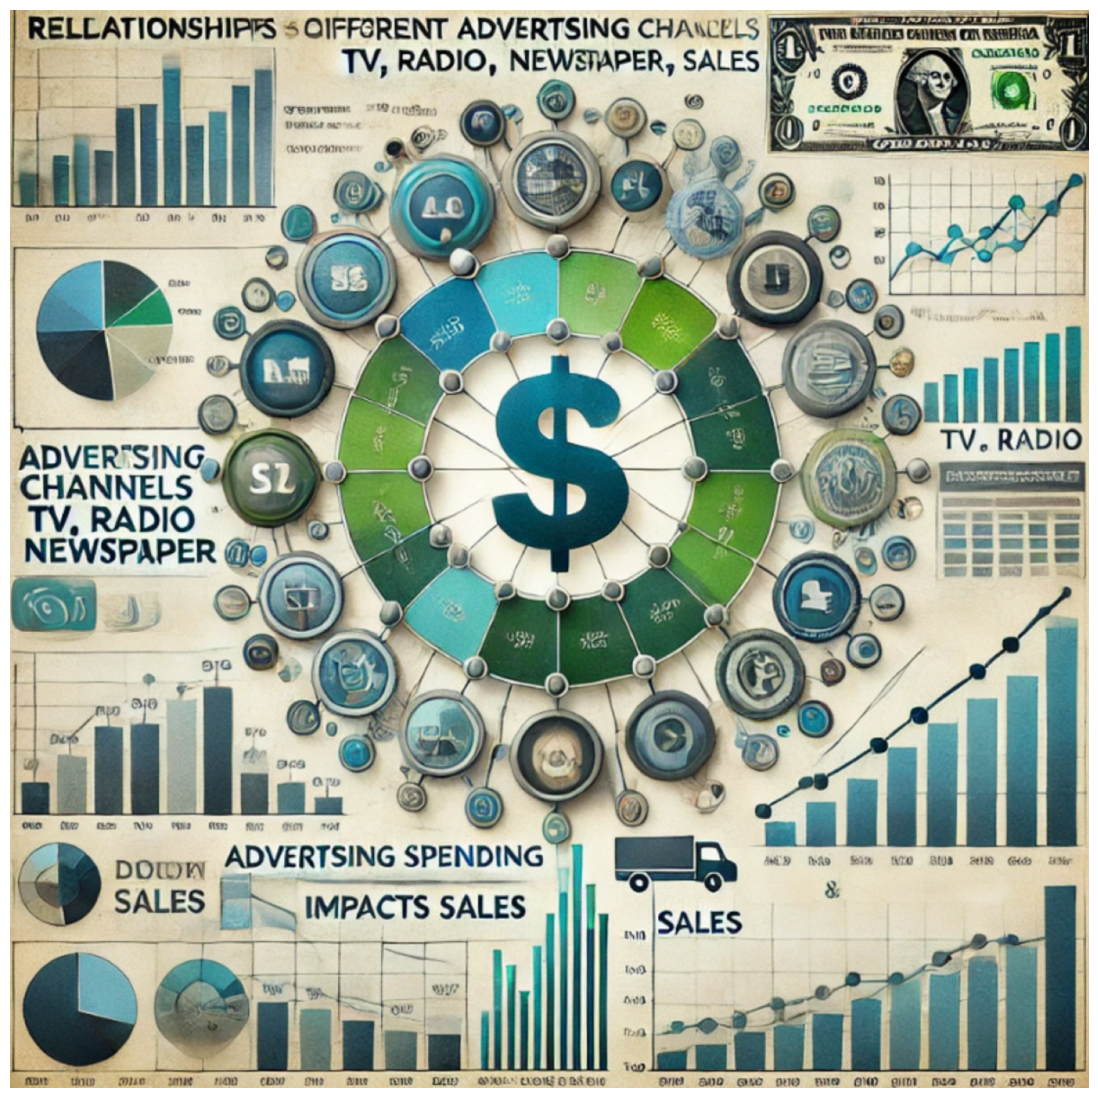

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Hp\Pictures\dataset-card.png")

plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')
plt.show()


<div style="background-color: #000000;
            color: #e10600;
            font-weight: bold;
            padding: 13px;
            border-radius: 15px;
            text-align: center;
            font-size: 28px;
            border: 3px solid #e10600;
            box-shadow: 0 0 10px #e10600,
                        0 0 20px rgba(225,6,0,0.7);">
📚 IMPORT LIBRARIES, STATISTICAL METHODS, ALGORITHMS, AND METRICS
</div>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

<div style="background-color: #000000;
            color: #e10600;
            font-weight: bold;
            padding: 13px;
            border-radius: 15px;
            text-align: center;
            font-size: 33px;
            border: 3px solid #e10600;
            box-shadow: 0 0 10px #e10600,
                        0 0 20px rgba(225,6,0,0.7);">
LOAD DATASET
</div>


In [3]:
df=pd.read_csv(r"C:\Users\Hp\Downloads\Advertising Budget and Sales.csv")
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


<table style="border-collapse: collapse; width: 70%; margin: auto; font-family: Arial; color: #FFFFFF;">
    <tr style="background-color: #444444;">
        <th style="padding: 8px; border: 1px solid #666666;">COLUMN</th>
        <th style="padding: 8px; border: 1px solid #666666;">DESCRIPTION</th>
    </tr>
    <tr style="background-color: #555555;">
        <td style="padding: 8px; border: 1px solid #666666;">UNNAMED: 0</td>
        <td style="padding: 8px; border: 1px solid #666666;">Record index</td>
    </tr>
    <tr style="background-color: #444444;">
        <td style="padding: 8px; border: 1px solid #666666;">TV AD BUDGET</td>
        <td style="padding: 8px; border: 1px solid #666666;">TV advertising spend</td>
    </tr>
    <tr style="background-color: #555555;">
        <td style="padding: 8px; border: 1px solid #666666;">RADIO AD BUDGET</td>
        <td style="padding: 8px; border: 1px solid #666666;">Radio advertising spend</td>
    </tr>
    <tr style="background-color: #444444;">
        <td style="padding: 8px; border: 1px solid #666666;">NEWSPAPER AD BUDGET</td>
        <td style="padding: 8px; border: 1px solid #666666;">Newspaper advertising spend</td>
    </tr>
    <tr style="background-color: #555555;">
        <td style="padding: 8px; border: 1px solid #666666;">SALES</td>
        <td style="padding: 8px; border: 1px solid #666666;">Total sales revenue</td>
    </tr>
</table>


<div style="background-color: #000000;
            color: #e10600;
            font-weight: bold;
            padding: 13px;
            border-radius: 15px;
            text-align: center;
            font-size: 33px;
            border: 3px solid #e10600;
            box-shadow: 0 0 10px #e10600,
                        0 0 20px rgba(225,6,0,0.7);">
CHECKING SHAPE, COLUMNS, DESCRIBE, INFO, UNIQUE
</div>



In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
for x in df:
    print(x)
    print(df[x].unique())
    print(df[x].nunique())

Unnamed: 0
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
200
TV Ad Budget ($)
[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 26


<div style="background-color: #000000;
            color: #e10600;
            font-weight: bold;
            padding: 13px;
            border-radius: 15px;
            text-align: center;
            font-size: 33px;
            border: 3px solid #e10600;
            box-shadow: 0 0 10px #e10600,
                        0 0 20px rgba(225,6,0,0.7);">
DATA-PREPROCESSING
</div>



<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 8px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
MISSING VALUE HANDLING
</div>



In [9]:
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [10]:
df=df.drop(columns=['Unnamed: 0'])

In [11]:
df

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 8px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
OUTLIER DETECTION
</div>


Outliers in TV Ad Budget ($): 0

Outliers in Radio Ad Budget ($): 0

Outliers in Newspaper Ad Budget ($): 2

Outliers in Sales ($): 0


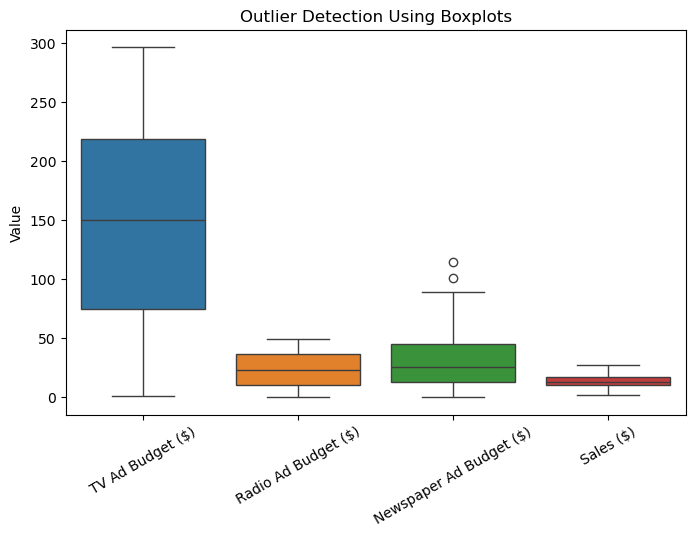

In [12]:
num_cols = [ 'TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)','Sales ($)']

outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutliers in {col}: {outliers[col].shape[0]}")
plt.figure(figsize=(8,5))
sns.boxplot(data=df[num_cols])
plt.title('Outlier Detection Using Boxplots')
plt.ylabel('Value')
plt.xticks(rotation=30)  
plt.show()



<div style="background-color: #000000;
            color: #e10600;
            font-weight: bold;
            padding: 13px;
            border-radius: 15px;
            text-align: center;
            font-size: 33px;
            border: 3px solid #e10600;
            box-shadow: 0 0 10px #e10600,
                        0 0 20px rgba(225,6,0,0.7);">
STATISTICAL ANALYSIS
</div>




<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 10px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
Shapiro-wilk test
</div>

In [13]:
for col in df.columns:
    stat, p = shapiro(df[col])
    print(col, "p-value:", p)

TV Ad Budget ($) p-value: 1.6926914202956402e-06
Radio Ad Budget ($) p-value: 5.197568642766821e-07
Newspaper Ad Budget ($) p-value: 1.1273217415340844e-07
Sales ($) p-value: 0.0016828565078876381




<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 10px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
 Variance_inflation_factor test
</div>

In [14]:
a = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
vif_data = pd.DataFrame()
vif_data["Feature"] = a.columns
vif_data["VIF"] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
print(vif_data)


                   Feature       VIF
0         TV Ad Budget ($)  2.486772
1      Radio Ad Budget ($)  3.285462
2  Newspaper Ad Budget ($)  3.055245


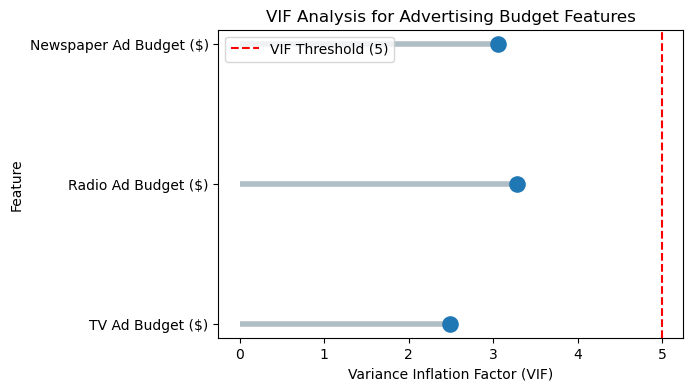

In [15]:
plt.figure(figsize=(6,4))
plt.hlines(y=vif_data['Feature'],xmin=0,xmax=vif_data['VIF'],color='#B0BEC5',linewidth=4)
plt.scatter(vif_data['VIF'],vif_data['Feature'],color='#1F77B4',s=120,zorder=3)
plt.axvline(x=5, color='red', linestyle='--', label='VIF Threshold (5)')
plt.xlabel('Variance Inflation Factor (VIF)')
plt.ylabel('Feature')
plt.title('VIF Analysis for Advertising Budget Features')
plt.legend()
plt.show()


#### All ad budget features have VIF values below 5, so there is no serious multicollinearity.

#### Radio Ad Budget has the highest VIF, but it is still within the acceptable range.

#### TV Ad Budget has the lowest VIF, meaning it is the most independent predictor.

#### Newspaper Ad Budget shows moderate correlation but is not problematic.




<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 10px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
  Z-Test
</div>

#### H0:There is no significant difference in mean Sales between Low and High TV Ad Budget groups.
#### H1:There is a significant difference in mean Sales between Low and High TV Ad Budget groups.

In [16]:
df['TV_Budget_Level'] = pd.qcut(df['TV Ad Budget ($)'], q=2, labels=['Low', 'High'])

In [17]:
high_sales = df[df['TV_Budget_Level']=='High']['Sales ($)']
low_sales = df[df['TV_Budget_Level']=='Low']['Sales ($)']

In [18]:
z_stat, p_val = ztest(high_sales, low_sales,value=0)

In [19]:
print("Z-statistic:", z_stat, "P-value:", p_val)

Z-statistic: 12.683513739268074 P-value: 7.2985179301990895e-37


In [20]:
alpha = 0.05

if p_val < alpha:
    print("A significant difference in Sales exists between Low and High TV Ad Budget groups.")
else:
    print("No significant difference in Sales exists between Low and High TV Ad Budget groups.")


A significant difference in Sales exists between Low and High TV Ad Budget groups.


C:\Users\Hp\AppData\Local\Temp\ipykernel_30320\3336671013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TV_Budget_Level',y='Sales ($)',data=df,palette=['#66c2a5', '#fc8d62'])


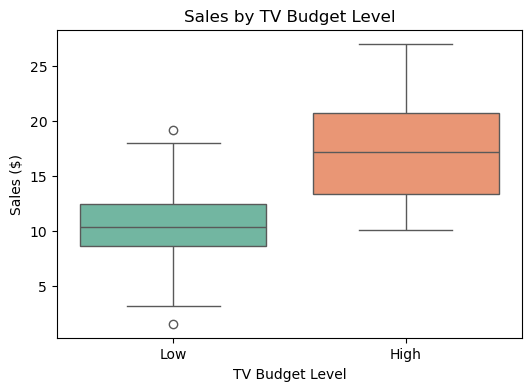

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x='TV_Budget_Level',y='Sales ($)',data=df,palette=['#66c2a5', '#fc8d62'])
plt.title('Sales by TV Budget Level')
plt.xlabel('TV Budget Level')
plt.ylabel('Sales ($)')
plt.show()

#### Sales are higher for the High TV Budget group compared to the Low TV Budget group.
#### The median sales are clearly greater with higher TV advertising spend, indicating a positive impact of TV ad budget on sales.




<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 10px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
 T-Test
</div>

<div style="background-color: transparent;
            color: #0B6623;
            font-weight: bold;
            padding: 7px;
            border-radius: 15px;
            text-align: center;
            font-size: 25px;
            border: 3px solid #2ECC71;
            box-shadow: 0 0 10px #58D68D,
                        0 0 20px rgba(46,204,113,0.7);">
 Two Tailed T-Test
</div>


#### H0:There is no significant difference in mean Sales between Low and High Radio Ad Budget groups.
#### H1:There is a significant difference in mean Sales between Low and High Radio Ad Budget groups.   

In [22]:
df['Radio_Budget_Level'] = pd.qcut(df['Radio Ad Budget ($)'], q=2, labels=['Low', 'High'])

In [23]:

high_sales1 = df[df['Radio_Budget_Level'] == 'High']['Sales ($)']
low_sales2 = df[df['Radio_Budget_Level'] == 'Low']['Sales ($)']


In [24]:
t_stat, p_valt = ttest_ind(high_sales1, low_sales2,equal_var=False)

In [25]:
print("T-statistic:", t_stat)
print("P-value:", p_valt)

T-statistic: 8.042349519202961
P-value: 2.5868899800539316e-13


In [26]:
alpha = 0.05

if p_valt < alpha:
    print("A significant difference in Sales exists between Low and High Radio Ad Budget groups.")
else:
    print("No significant difference in Sales exists between Low and High Radio Ad Budget groups.")


A significant difference in Sales exists between Low and High Radio Ad Budget groups.



<div style="background-color: transparent;
            color: #0B6623;
            font-weight: bold;
            padding: 7px;
            border-radius: 15px;
            text-align: center;
            font-size: 25px;
            border: 3px solid #2ECC71;
            box-shadow: 0 0 10px #58D68D,
                        0 0 20px rgba(46,204,113,0.7);">
 One Tailed T-Test
</div>

In [27]:
one_tailed_p = p_valt / 2
if t_stat > 0 and one_tailed_p < 0.05:
    print("Reject the null hypothesis: High budget leads to higher sales.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis: High budget leads to higher sales.


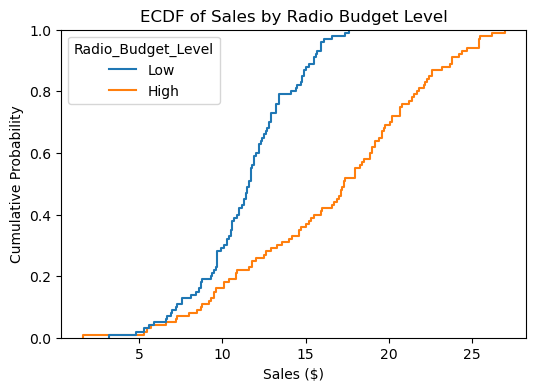

In [28]:
plt.figure(figsize=(6,4))
sns.ecdfplot(data=df, x='Sales ($)',hue='Radio_Budget_Level')
plt.title('ECDF of Sales by Radio Budget Level')
plt.xlabel('Sales ($)')
plt.ylabel('Cumulative Probability')
plt.show()

#### The High Radio Budget curve is shifted to the right, indicating higher sales overall.

#### At any given cumulative probability, sales are higher for the High budget group than the Low budget group.

#### The Low budget group reaches 100% probability at lower sales values, showing lower sales outcomes.

#### This suggests a positive impact of higher radio advertising budget on sales.

  


<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 10px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
Chi-Square-test
</div>

In [29]:
df['Sales_Category'] = pd.qcut(df['Sales ($)'], q=2, labels=['Low', 'High'])

In [30]:
contingency_table = pd.crosstab(df['Radio_Budget_Level'], df['Sales_Category'])
print(contingency_table)

Sales_Category      Low  High
Radio_Budget_Level           
Low                  73    27
High                 29    71


In [31]:
chi2_stat, p_valc, dof, expected = chi2_contingency(contingency_table)

In [32]:
print("Chi2 Statistic:", chi2_stat)
print("P-value:", p_valc)
print("Degrees of freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 36.99479791916767
P-value: 1.1844483309076764e-09
Degrees of freedom: 1
Expected Frequencies:
 [[51. 49.]
 [51. 49.]]


In [33]:
if p_valc < 0.05:
    print(f"There is a statistically significant association between {col} and Sales_Category.")
else:
    print(f"There is no statistically significant association between {col} and Sales_Category.")
print("\n")

There is a statistically significant association between Sales ($) and Sales_Category.




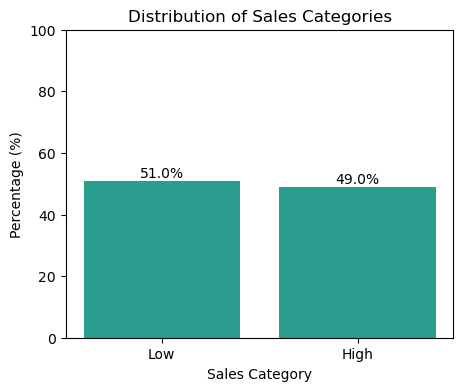

In [34]:
sales_count = df['Sales_Category'].value_counts(normalize=True) * 100
plt.figure(figsize=(5,4))
plt.bar(sales_count.index,sales_count.values,color='#2A9D8F')
plt.title('Distribution of Sales Categories')
plt.xlabel('Sales Category')
plt.ylabel('Percentage (%)')
plt.ylim(0,100)
for i, v in enumerate(sales_count.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.show()

#### Sales are almost evenly split between categories.

#### Low sales ≈ 51% and High sales ≈ 49%.

#### There is no strong imbalance in sales categories.

#### The dataset is well-balanced for analysis and modeling.




<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 10px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
Anova Test
</div>

In [35]:
anova_data = df[['Radio_Budget_Level', 'Sales ($)']]

In [36]:
anova_data

,Radio_Budget_Level,Sales ($)
0,High,22.1
1,High,10.4
2,High,9.3
3,High,18.5
4,Low,12.9
...,...,...
195,Low,7.6
196,Low,9.7
197,Low,12.8
198,High,25.5


In [37]:
groups = anova_data.groupby('Radio_Budget_Level')['Sales ($)'].apply(list)
groups

C:\Users\Hp\AppData\Local\Temp\ipykernel_30320\3232435795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = anova_data.groupby('Radio_Budget_Level')['Sales ($)'].apply(list)


Radio_Budget_Level
Low     [12.9, 13.2, 4.8, 10.6, 8.6, 9.7, 11.3, 12.5, ...
High    [22.1, 10.4, 9.3, 18.5, 7.2, 11.8, 17.4, 9.2, ...
Name: Sales ($), dtype: object

In [38]:
f_statistic, p_value = stats.f_oneway(*groups)

In [39]:
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 64.67938578902418
P-value: 7.900541793134626e-14


In [40]:
if p_value < 0.05:
    print("There are significant differences between the groups.")
else:
    print("There are no significant differences between the groups.")

There are significant differences between the groups.


### p_value < 0.05 → reject H₀ → H₁ is true → difference exists

### p_value ≥ 0.05 → fail to reject H₀ → no significant difference

C:\Users\Hp\AppData\Local\Temp\ipykernel_30320\2800662259.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('Radio_Budget_Level')['Sales ($)'].agg(['median', 'mean'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_30320\2800662259.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i] - width/2, summary['median'][i] + 0.4, f"{summary['median'][i]:.2f}", ha='center')
C:\Users\Hp\AppData\Local\Temp\ipykernel_30320\2800662259.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wi

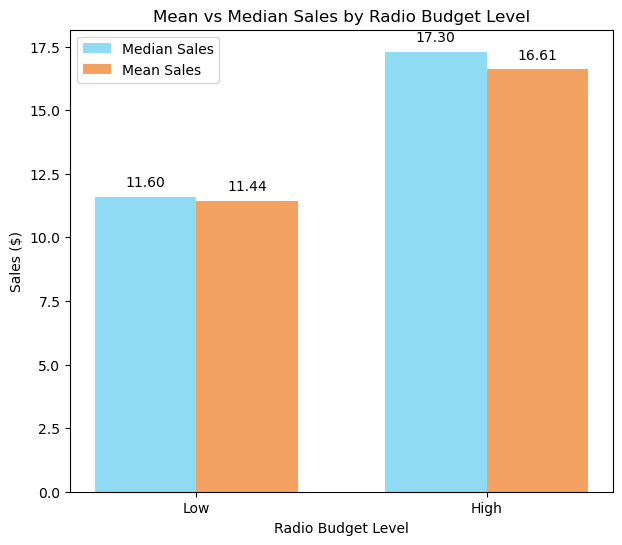

In [41]:
summary = df.groupby('Radio_Budget_Level')['Sales ($)'].agg(['median', 'mean'])
x = np.arange(len(summary.index))
width = 0.35
plt.figure(figsize=(7,6))
plt.bar(x - width/2,summary['median'], width,color='#90DBF4',label='Median Sales')
plt.bar(x + width/2,summary['mean'],width,color='#F4A261',label='Mean Sales')
plt.xticks(x, summary.index)
plt.title('Mean vs Median Sales by Radio Budget Level')
plt.xlabel('Radio Budget Level')
plt.ylabel('Sales ($)')
plt.legend()
for i in range(len(x)):
    plt.text(x[i] - width/2, summary['median'][i] + 0.4, f"{summary['median'][i]:.2f}", ha='center')
    plt.text(x[i] + width/2, summary['mean'][i] + 0.4, f"{summary['mean'][i]:.2f}", ha='center')
plt.show()

#### High Radio Budget has much higher sales than Low Radio Budget.

#### Both mean and median sales increase from Low → High budget.

#### Mean and median values are very close, indicating sales are fairly symmetric (no strong skew).

#### This supports the conclusion that higher radio advertising spend leads to higher sales and is suitable for ANOVA comparison.



<div style="background-color: #000000;
            color: #e10600;
            font-weight: bold;
            padding: 13px;
            border-radius: 15px;
            text-align: center;
            font-size: 33px;
            border: 3px solid #e10600;
            box-shadow: 0 0 10px #e10600,
                        0 0 20px rgba(225,6,0,0.7);">
MODEL BULIDING
</div>

<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 10px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
SCALING
</div>

In [42]:
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_pred = model.predict(X_test_scaled)




<div style="background-color: transparent;
            color: #003366;
            font-weight: bold;
            padding: 10px;
            border-radius: 15px;
            text-align: center;
            font-size: 30px;
            border: 3px solid #3399ff;
            box-shadow: 0 0 10px #66b2ff,
                        0 0 20px rgba(102,178,255,0.7);">
F-Test
</div>

In [48]:
n = len(y_test)  
p = X_train.shape[1]

In [49]:
RSS = np.sum((y_test - y_pred) ** 2)

In [50]:
TSS = np.sum((y_test - np.mean(y_test)) ** 2)

In [51]:
ESS = TSS - RSS

In [52]:
MSE = RSS / (n - p - 1)

In [53]:
MSR = ESS / p

In [54]:
F_statistic = MSR / MSE

In [55]:
p_value = 1 - stats.f.cdf(F_statistic, p, n - p - 1)

In [56]:
print('F-statistic:', F_statistic)
print('p-value:', p_value)

F-statistic: 107.32939754526865
p-value: 1.1102230246251565e-16


In [57]:
if p_value < 0.05:
    print('The model is significant at the 5% significance level.')
else:
    print('The model is not significant at the 5% significance level.')

The model is significant at the 5% significance level.


In [58]:
MSE

np.float64(3.526774837751228)

In [59]:
mse=mean_squared_error(y_test,y_pred)
mse

3.174097353976105

### * F-statistic = 107.33, p-value ≈ 0 → model is highly significant.
### * Rejects null hypothesis: model explains variation in the response variable.
### * Mean Squared Error (MSE) ≈ 3.17 measures prediction accuracy.
### * Model is statistically valid and predicts reasonably well.



<div style="background-color: transparent;
            color: #0B6623;
            font-weight: bold;
            padding: 7px;
            border-radius: 15px;
            text-align: center;
            font-size: 25px;
            border: 3px solid #2ECC71;
            box-shadow: 0 0 10px #58D68D,
                        0 0 20px rgba(46,204,113,0.7);">
R2_Score
</div>

In [60]:
r2=r2_score(y_test,y_pred)
r2

0.899438024100912

<div style="background-color: transparent;
            color: #0B6623;
            font-weight: bold;
            padding: 7px;
            border-radius: 15px;
            text-align: center;
            font-size: 25px;
            border: 3px solid #2ECC71;
            box-shadow: 0 0 10px #58D68D,
                        0 0 20px rgba(46,204,113,0.7);">
Overall Conclusion
</div> 


#### The analysis shows that advertising expenditure has a significant impact on sales.
#### The multiple linear regression model is statistically reliable, with a high R² value and a low Mean Squared Error, indicating good prediction accuracy.
#### Among the advertising channels, TV and Radio advertising have a strong positive effect on sales, while Newspaper advertising has a comparatively weaker influence.
#### Overall, the model effectively predicts sales and can help businesses make better decisions when allocating advertising budgets.